The documents to be explored are from fictions of three authors.
- AChristmasCarol_Dickens.txt
- ATaleofTwoCities_Dickens.txt
- GreatExpectations_Dickens.txt


- Emma_Austen.txt
- Persuasion_Austen.txt
- PrideandPrejudice_Austen.txt


- HenryV_Shakespeare.txt
- Macbeth_Shakespeare.txt
- Richard3_Shakespeare.txt

In [96]:
import os
import numpy as np
import sklearn.feature_extraction.text as text

data_dir = 'Fictions/'

filenames = np.array(sorted(os.listdir(data_dir)))

filenames_with_path = [os.path.join(data_dir, fn) for fn in filenames] # join the path with filenames

In [97]:
filenames_with_path

['Fictions/AChristmasCarol_Dickens.txt',
 'Fictions/ATaleofTwoCities_Dickens.txt',
 'Fictions/Emma_Austen.txt',
 'Fictions/GreatExpectations_Dickens.txt',
 'Fictions/HenryV_Shakespeare.txt',
 'Fictions/Macbeth_Shakespeare.txt',
 'Fictions/Persuasion_Austen.txt',
 'Fictions/PrideandPrejudice_Austen.txt',
 'Fictions/Richard3_Shakespeare.txt']

In [98]:
vectorizer = text.CountVectorizer(input='filename')

In [99]:
dtm = vectorizer.fit_transform(filenames_with_path)


In [100]:
vocab = np.array(vectorizer.get_feature_names())

In [101]:
# sum over rows to calculate lengths(the numbers in a row are word frequency of a document,so sum the numbers to get the word count of each document)
lengths = np.sum(dtm, axis=1)
print lengths



[[ 31549]
 [135479]
 [157653]
 [179083]
 [ 28605]
 [ 19700]
 [ 83924]
 [121170]
 [ 33849]]


In [102]:

# plot histogragh
import matplotlib.pyplot as plt


plt.hist(lengths,edgecolor='black',facecolor='blue')



(array([ 4.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.]),
 array([  19700. ,   35638.3,   51576.6,   67514.9,   83453.2,   99391.5,
         115329.8,  131268.1,  147206.4,  163144.7,  179083. ]),
 <a list of 10 Patch objects>)

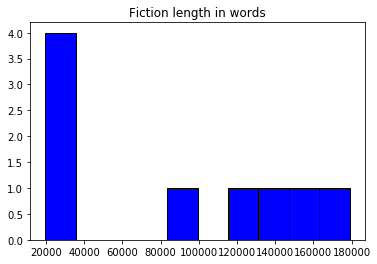

In [103]:
plt.title("Fiction length in words")
plt.show()

In [17]:
# find the longest and the shortest texts

(np.max(lengths), filenames[np.argmax(lengths)])

(179083, 'GreatExpectations_Dickens.txt')

In [18]:
(np.min(lengths), filenames[np.argmin(lengths)])

(19700, 'Macbeth_Shakespeare.txt')

### Measure of distance

In [82]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

In [83]:
dist = 1 - cosine_similarity(dtm)

#### Multidimensional scaling
简称MDS，中文翻译成多维尺度分析。其原理是利用成对样本间的相似性，去构建合适的低维空间，使得样本在此空间的距离和在高维空间中的样本间的相似性尽可能的保持一致。我们可以用这种方式来可视化数据分布。

In [84]:
# 很难多维可视化，所以通过MDS算法来降维描绘
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)


In [85]:
# create very short names for plotting
# filenames have form: AChristmasCarol_Dickens .txt

authors = [] 
names = []

In [86]:
for fn in filenames:
    author = fn.split('_')[1]
    authors.append(author)
    names.append(fn)

In [87]:
plt.figure(figsize=(11.3, 7)) 

In [88]:
xs, ys = pos[:, 0], pos[:, 1]
authors_unique = sorted(set(authors)) # get unique authors
print authors_unique

['Austen.txt', 'Dickens.txt', 'Shakespeare.txt']


In [89]:
colors = [authors_unique.index(a) for a in authors] # get a unique color for texts of each author  

plt.scatter(xs, ys,c=colors,cmap='viridis')


In [90]:
for x, y, name in zip(xs, ys, names):
    plt.text(x, y, name, alpha=0.5, fontsize=10)

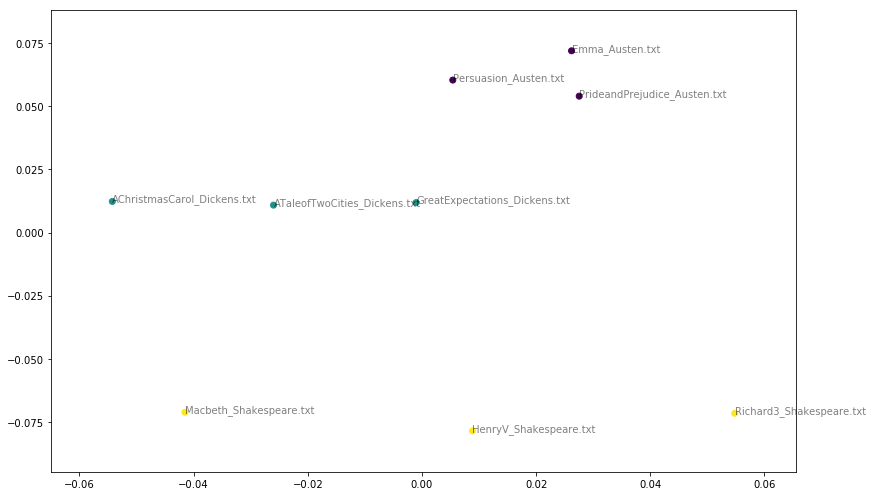

In [91]:
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# tight_layout: https://matplotlib.org/users/tight_layout_guide.html
plt.tight_layout()
plt.show()

### dendrogram

In [92]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)

In [93]:
plt.figure(figsize=(11.3, 11.3)) 

In [94]:
dendrogram(linkage_matrix, orientation="right", labels=names, leaf_font_size=5);

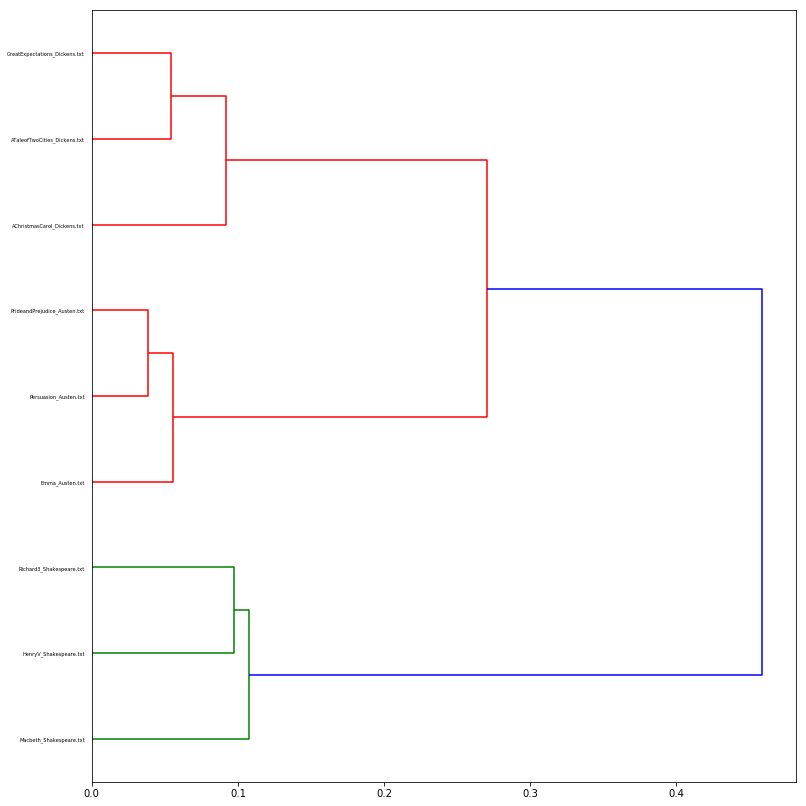

In [95]:

plt.tight_layout()
plt.show()

- Charles John Huffam Dickens (1812-1870)
- Jane Austen (1775-1817)
- William Shakespeare (1564-1616)
